# SLY: Creación de gramáticas

### ¿Qué son las expresiones regulares?
Una expresión regular es una secuencia de caracteres que conforma un **patrón de búsqueda**. Se utilizan principalmente para la búsqueda de patrones de cadenas de caracteres u operaciones de sustituciones.

Algunos de los usos más comunes son:
- Agrupación de elementos similares
- Detección de valores erróneos/anómalos
- Sistemas de búsqueda en textos
- Sistemas de reemplazo en textos
- Creación y análisis de gramáticas


No sólo se usa como herramienta para el análisis y depuración de cadenas de texto, sino que además desempeñan un papel fundamental en los motores de búsqueda debido a la rapidez que pueden llegar a alcanzar. Uno de los ejemplos de uso cotidianos es Google Dorks (https://www.boxpiper.com/posts/google-dork-list).

In [37]:
import re # https://docs.python.org/3/library/re.html     https://docs.python.org/es/3/howto/regex.html


# ------------------- Encontrar patrones ----------------------
txt = "Tres tristes tigres comen trigo en un trigal"
patron = ".*gres"
x = re.search(patron, txt)
print("Objeto match: ", x)
if x:
  print(f"El texto dado ({txt}) contiene al menos una coincidencia con el patrón dado ({patron}).")
else:
  print(f"El texto dado ({txt}) NO contiene ninguna coincidencia con el patrón dado ({patron}).")


# ------------------ Trabajar con ocurrencias --------------------
patron = ' '
x = re.search(patron, txt)

print(f"La primera ocurrencia de ({patron}) se da en el índice: ", x.start()) 

# ---------------- Split ---------------
x = re.split(patron, txt)
print(f"Resultado de dividir por el patrón ({patron}): ", x)

# ---------------- Replace -------------
x = re.sub(" ", "_", txt)
print(f"Resultado de hacer la sustitución de ' ' por '_': ", x)



Objeto match:  <re.Match object; span=(0, 19), match='Tres tristes tigres'>
El texto dado (Tres tristes tigres comen trigo en un trigal) contiene al menos una coincidencia con el patrón dado (.*gres).
La primera ocurrencia de ( ) se da en el índice:  4
Resultado de dividir por el patrón ( ):  ['Tres', 'tristes', 'tigres', 'comen', 'trigo', 'en', 'un', 'trigal']
Resultado de hacer la sustitución de ' ' por '_':  Tres_tristes_tigres_comen_trigo_en_un_trigal


### ¿Qué es una gramática?
https://plato.stanford.edu/entries/computational-linguistics/

Una gramática es un conjunto de estructuras en base a un vocabulario que sirve para codificar y decodificar mensajes.

Existen diversos tipos de gramáticas diferentes al igual que muchas aplicaciones variadas. Algunos ejemplos de uso cotidiano son calculadoras, traductores, compiladores, autómatas, motores de búsqueda y algunos transmisores de información.

-> Elementos principales: Lenguaje (Lexer, donde se aloja el vocabulario) y Reglas (Parser, donde se alojan las estructuras).

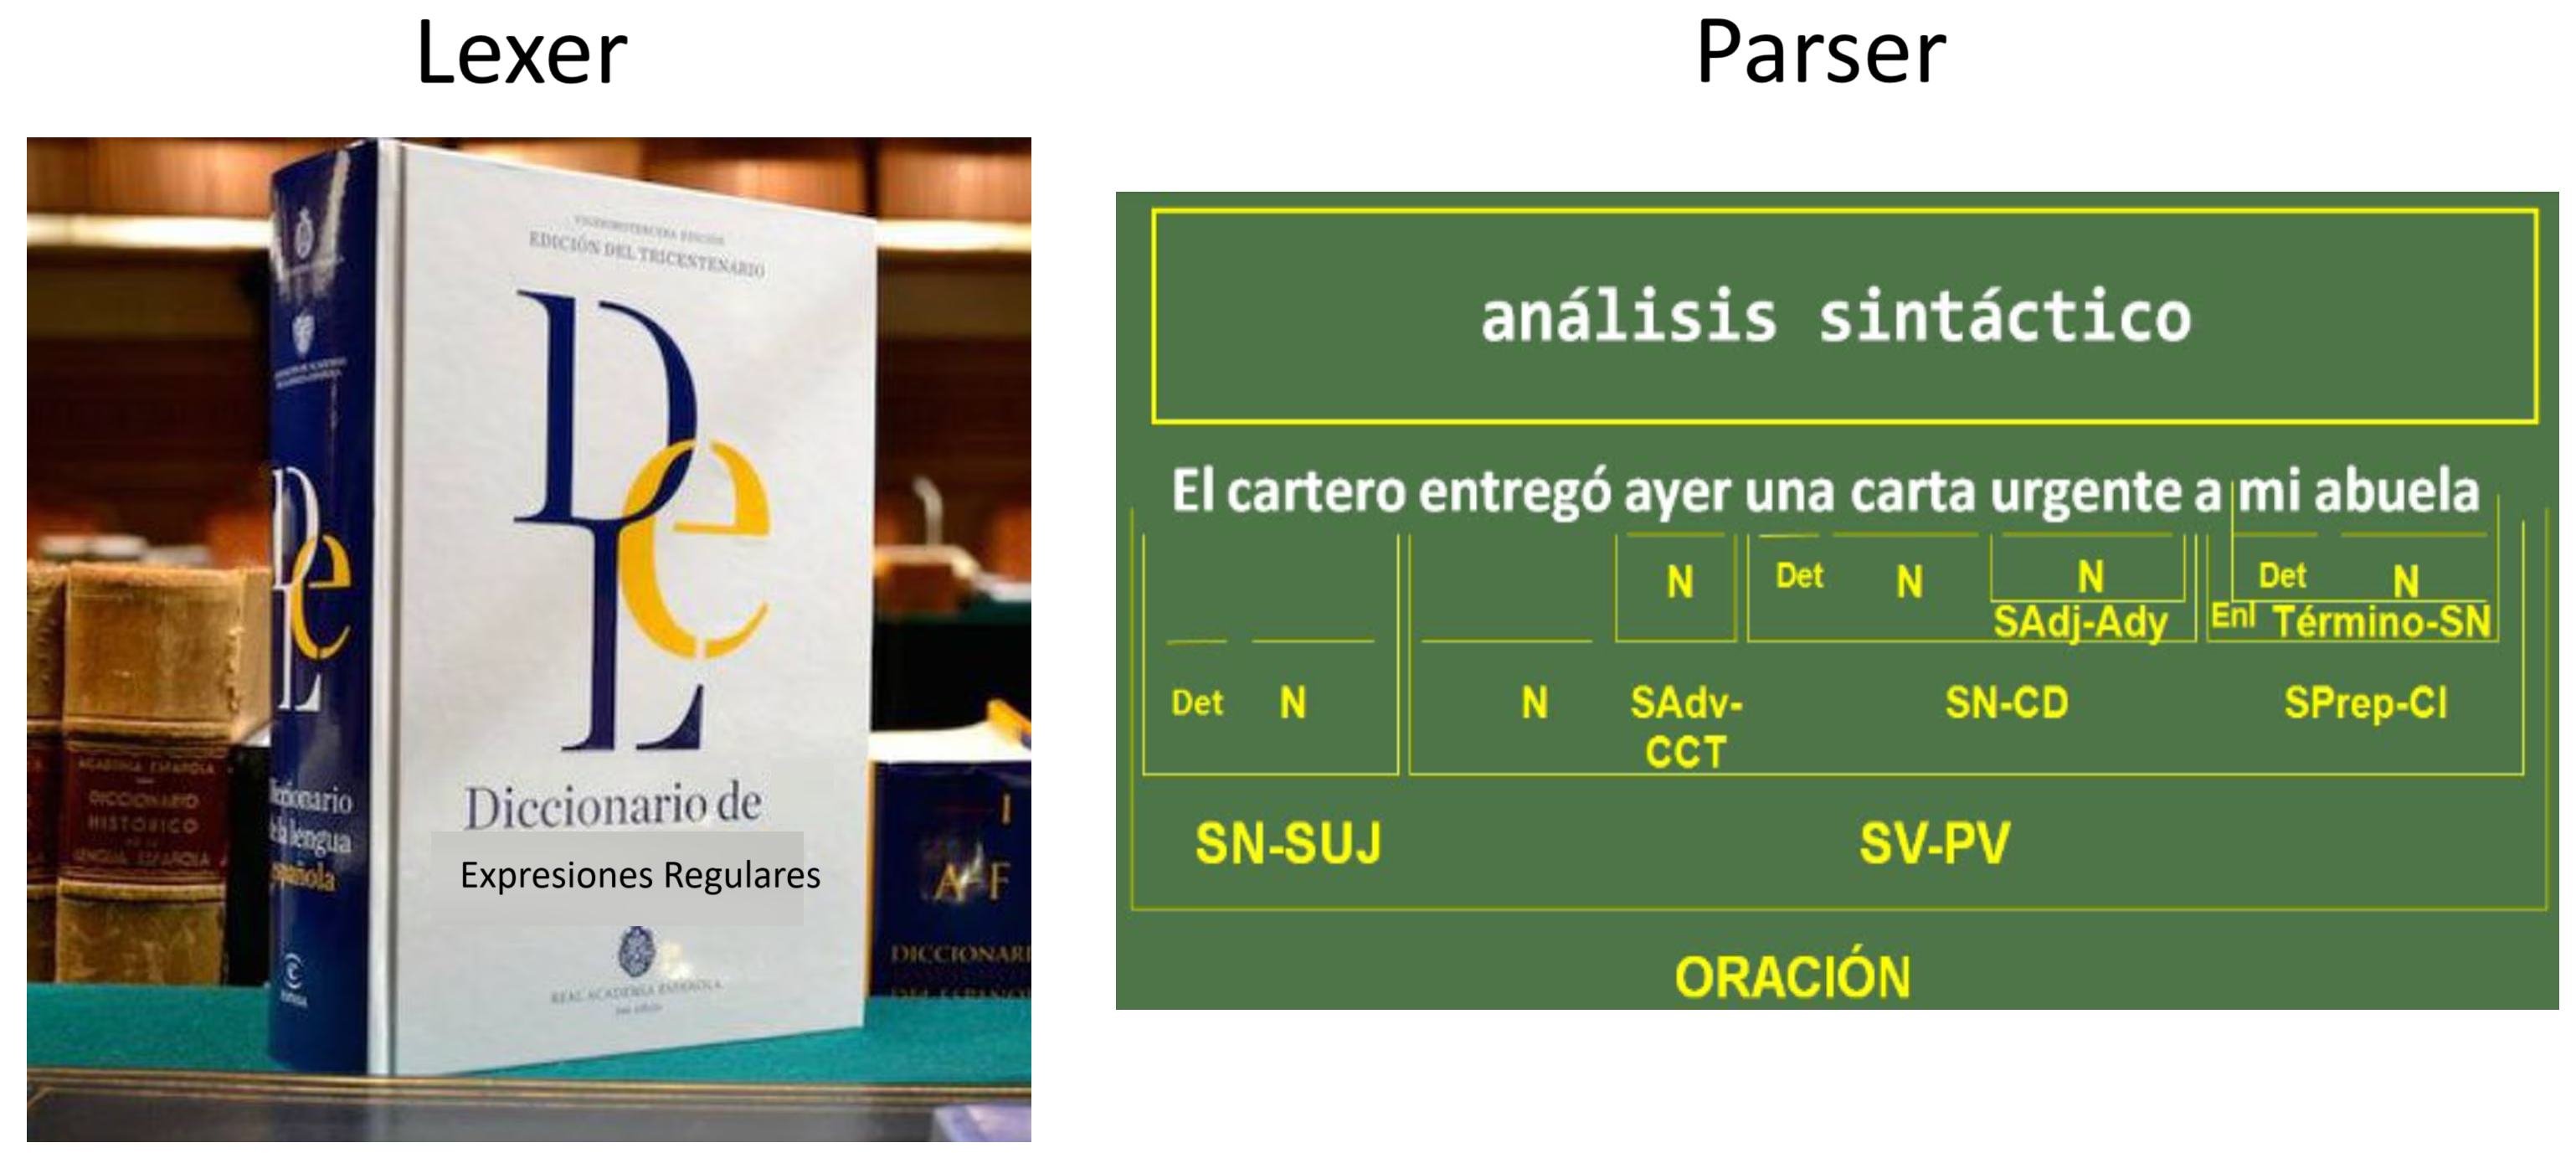


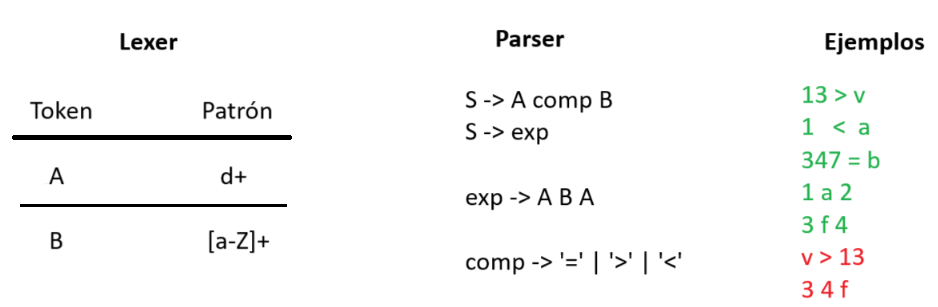

In [38]:
#Documentación; https://sly.readthedocs.io/en/latest/sly.html

from sly import Lexer, Parser

class CalcLexer(Lexer):
    # Set of token names.   This is always required
    tokens = { ID, NUMBER, PLUS, MINUS, TIMES,
               DIVIDE, ASSIGN, LPAREN, RPAREN }

    # String containing ignored characters between tokens
    ignore = ' \t'

    # Regular expression rules for tokens
    ID      = r'[a-zA-Z_][a-zA-Z0-9_]*'
    NUMBER  = r'\d+'
    PLUS    = r'\+'
    MINUS   = r'-'
    TIMES   = r'\*'
    DIVIDE  = r'/'
    ASSIGN  = r'='
    LPAREN  = r'\('
    RPAREN  = r'\)'
    

data = 'x = 3 + 42 * (s - t)'
lexer = CalcLexer()
for tok in lexer.tokenize(data):
    print('type=%r, value=%r' % (tok.type, tok.value))

type='ID', value='x'
type='ASSIGN', value='='
type='NUMBER', value='3'
type='PLUS', value='+'
type='NUMBER', value='42'
type='TIMES', value='*'
type='LPAREN', value='('
type='ID', value='s'
type='MINUS', value='-'
type='ID', value='t'
type='RPAREN', value=')'


In [39]:
class CalcParser(Parser):
    # Get the token list from the lexer (required)
    tokens = CalcLexer.tokens

    # Grammar rules and actions
    @_('ID ASSIGN expr')
    def expr(self, p):
        return "Asignada variable " + p.ID + " el valor " + str(p.expr)
    
    @_('expr PLUS term')
    def expr(self, p):
        return p.expr + p.term

    @_('expr MINUS term')
    def expr(self, p):
        return p.expr - p.term

    @_('term')
    def expr(self, p):
        return p.term

    @_('term TIMES factor')
    def term(self, p):
        return p.term * p.factor

    @_('term DIVIDE factor')
    def term(self, p):
        return p.term / p.factor

    @_('factor')
    def term(self, p):
        return p.factor

    @_('NUMBER')
    def factor(self, p):
        return int(p.NUMBER)

    @_('LPAREN expr RPAREN')
    def factor(self, p):
        return p.expr

import time
lexer = CalcLexer()
parser = CalcParser()
text='a'
while text != '':
    text = input('calc > ')
    print(parser.parse(lexer.tokenize(text)))
    time.sleep(1)

sly: Parse error in input. EOF


None



## Un ejemplo más potente - Características del compilador de C
29 características incluidas:
<ul>
<li> Gramática: Operadores aritméticos básicos: Asignación (individual), comparación, lógica, aritmética (+, -, *, /, -)</li>
<li> Gramática: Declaraciones de funciones, variables y variables globales: vars de tipo entero, funciones de tipo void y entero.</li>
<li> Gramática: Uso de punteros y arrays</li>
<li> Gramática: Bloques condicionales: if-else, bucles while y estructura anidada.</li>
<li> Gramática: Uso de funciones declaradas.</li>
<li> Gramática: Uso de funciones pre-declaradas: printf y scanf</li>
<li> Gramática: Funciones de tipo void*, void**...</li>
<li> Gramática: Comprobación para no usar keywords como variables</li>
<li> Gramática: Operador unario '+'</li>
<li> Gramática: Hemos incluido la keyword 'register'</li>
<li> Gramática: Comentarios monolínea y multilínea permitidos</li>
<li> Gramática: Permitir instrucciones vacías (hacer cosas como ";;;;")</li>
<li> Gramática: Tipo de variable extra, el tipo char.</li>
<li> Gramática/Funcionalidad: Operador de []</li>
<li> Gramática/Funcionalidad: Constantes en hexadecimal </li>
<li> Gramática/Funcionalidad: Asignaciones múltiples y su traducción a ensamblador</li>
<li> Gramática/Funcionalidad: Keywords 'true' y 'false' y su traducción a ensamblador</li>
<li> Gramática/Funcionalidad: Bucles Do-While y su traducción a ensamblador</li>
<li> Gramática/Funcionalidad: GOTO y uso de etiquetas y su traducción a ensamblador</li>
<li> Gramática/Funcionalidad: Arrays n-dimensionales</li>
<li> Gramática/Funcionalidad: Operaciones aritméticas extras (+=,-=,*=,/=,&=,|=)</li>
<li> Gramática/Funcionalidad: Keywords extras (continue, break)</li>
<li> Gramática/Funcionalidad: Const (sólo pueden ser asignadas durante la declaración de variables, aunque agrupa el tipo entero así que los punteros a valor constante también son constantes y por lo tanto no sirven directamente)</li>
<li> Funcionalidad: Traducción a ensamblador de lo anterior </li>
<li> Funcionalidad: Chequeo de tipos similar al de los compiladores de C</li>
<li> Funcionalidad: Creación de ámbitos dentro de funciones y bloques condicionales</li>
<li> Funcionalidad: Chequeo de pre-declaración antes de uso de variable (respetando los ámbitos)</li>
<li> Funcionalidad: El resultado se imprime en el cuaderno como en el fichero "RESULTADO.asm". Además, también imprime por pantalla los ámbitos de las funciones y el código aceptado para hacer testeo de una forma cómoda.</li>
<li> Eficiencia: Condicionales comprobadas con flags en lugar de incluir saltos</li>
<li> Eficiencia: Las vars globales y constantes no se meten en la pila y eliminación de instrucciones redundantes.</li>
<li> Código: Optimizado, sólo emplea reglas gramaticales y AST, permite una mayor adaptabilidad a extensiones.</li>
</ul>

In [40]:
from sly import Lexer, Parser

cinta = []         # Lugar donde se guarda la traducción
cintaDataSection = [] # Lugar donde se ponen las variables estáticas / constantes
Scope = "1" # Estado del scope actual (nombre)
nFun = 1    # Cuenta de funciones
nAmbito = 1 # Cuenta de sub-ambitos

BancoVars = dict({})  # Banco con las variables por scope
BancoVars[Scope] = [] # Pre-inicializamos el scope global


tipo_aux = None    # Nodo auxiliar para las declaraciones
nom_aux = ""       # String auxiliar para las declaraciones
despl_aux = []     # Lista de vectores para las declaraciones
pila_asig_aux = [] # Pila con las asignaciones para poder invertirlas en el arbol
pointer_cont = 0
pila_nom = []      # Una pila auxiliar con nombres de variables de la declaracion
pila_desp = []     # Una pila auxiliar con desplazamientos de variables de la declaracion

nCadenas = 0       # Para enumerar las cadenas en la traducción ($s0, $s1...)
BancoFunc = dict({})  # Para saber tamaños de las funciones. En funcion de esto y el scope, se deducen las variables.
#[longitud_entrada, n_vars_int, nodo n_DecFunc]

nomFunaux = ""     # Para indexar en BancoFunc
length_PE = 0      # Para el banco de funciones, cantidad de parámetros de entrada
fix_lPE = 0        # Necesario para mantenerlo fijo
length_PI = 0      # Para el banco de funciones, cantidad de parámetros interiores
length_OC = 0      # Contador para el cálculo del "Ofsset" con el operador [] "Corchetes"
lenLA = 0          # Para printf y scanf

etiqueta = 0       # Para el sistema de etiquetado
dentroBucle = False
etiquetasBucle = []

conversiones = dict({})
idxConversion = dict({})

canEditConstVars = False

In [41]:
NoConversionError = lambda a,b,w : Exception("No hay conversión entre los tipos "+str(a)+" y "+str(b)+" en "+w+".")

# ------------------------------------------------------------------------------------------
# --------------------------------- Tipos de nodos del AST ---------------------------------
# ------------------------------------------------------------------------------------------

# ------------------------------------- Nodos genéricos ------------------------------------

class Nodo():
    def __init__(self):
        self.ID = 0
        self.a = None
        self.b = None
    def Assem(self):
        return 0
    def Tipo(self):
        return None

class n_Pareja(Nodo):
    def __init__(self, n_act, n_sig):
        self.ID = 99
        self.a = n_act
        self.b = n_sig
    def Assem(self):
        if self.a is not None: # Primero desarrollamos el nodo actual
            self.a.Assem();
        if self.b is not None: # Luego el siguiente nodo
            self.b.Assem();
        pass
    
# ------------------------------------- Tipos de datos ------------------------------------

class t_VOID(Nodo):
    def __init__(self):
        self.ID = -1
    def Assem(self):
        raise Exception("No puedes usar void como tipo de variable.")
    def Tipo(self):
        return "void"
    
class t_INT(Nodo):
    def __init__(self):
        self.ID = -2
    def Assem(self):
        pass
    def Tipo(self):
        return "int"
    
class t_CONST(Nodo):
    def __init__(self, val, tipo = "int"):
        self.ID = -3
        self.a = "$" + str(val)
        self.t = tipo
    def Assem(self):
        cinta.append("PUSHL " + self.a + "\n")
    def Tipo(self):
        return self.t

class t_C(Nodo): #Para variables con la keyword 'const'
    def __init__(self, refiriendo_a):
        self.ID = -22
        self.a = refiriendo_a
    def Assem(self):
        return self.a
    def Tipo(self):
        t = self.a.Tipo()
        if t[0] == '_':
            return t
        else:
            return '_'+t
        
    
class t_CHAR(Nodo):
    def __init__(self,caracter = '0'):
        self.ID = -20
        self.a = '$' + str(ord(caracter))
    def Assem(self):
        cinta.append("PUSHL " + self.a + "\n")
    def Tipo(self):
        return "char"
        
class t_DIR(Nodo):
    def __init__(self, apunta_a):
        self.ID = -4
        self.a = apunta_a
    def Assem(self):
        return self.a
    def Tipo(self):
        return self.a.Tipo() + "*"
    
class t_DUMMY(Nodo):
    def __init__(self):
        self.ID = -21
    def Assem(self):
        raise Exception("No debería ser posible esto.")
    def Tipo(self):
        return 'dummy'
    
class n_VAR(Nodo):
    def __init__(self, nom_t, nom, tipo, despl):
        self.ID = -5
        self.a = nom_t   # nom_t es 'x(%ebp)' o "$nom"
        self.b = nom     # nom es el nombre en el código
        self.c = tipo    # tipo es un nodo t_DIR, t_VOID o t_INT
        self.d = despl   # caso de vectores. Serie de numeros.
        self.e = []      # offset precalculado de cada dimensión
        self.f = 0
        if nom_t[-1] == ")":
            self.f = int(nom_t[0:nom_t.find('(')])
        #Precálculo de 'e'
        l = len(self.d)
        for i in range(0,l):
            mult = 1
            for sigs in range(l-i-1,0,-1):
                mult = mult*self.d[sigs]
            self.e.append(mult)
        
    def Assem(self):
        cinta.append("PUSHL " + self.a + "\n")
        pass
    def Tipo(self):
        return self.c.Tipo()
    def EsArray(self, hasta = 0):
        limite = max(len(self.d),hasta)
        for i in range(0,limite):
            if self.d[i] != 0:
                return True
        return False
          
class n_VAR_OFFSET(Nodo):
    def __init__(self, nodoHijo, offset, dimension):
        self.ID = -7
        self.a = nodoHijo   # Nodo n_VAR ó n_VAR_OFFSET
        self.b = offset    # Cualquier nodo salido de una expresión
        self.c = dimension # índice de la dimensión de la variable en n_VAR
        var = self
        while var.ID != -5:
            var = var.a
        self.d = var # Atajo a n_VAR
        
    def Assem(self):
        # 1º Se busca el nodo VAR bajando por los nodos Offset
        nActual = self
        nDimensionesVariable = len(self.d.d)
        
        # 2º Comprobar si es una dimensión correcta
        if nActual.c > nDimensionesVariable:
            raise Exception("Error de acceso a variable.")
        
        #                                          3º 2º 1º
        #Acceso de derecha a izquierda -> variable[0][1][2]
        iter = 0
        cinta.append("MOVL $0, %eax \nPUSHL %eax \n")
        while nActual.ID != -5: # No n_VAR
            nActual.b.Assem() # ...[EXP]...
            cinta.append("POPL %eax \n")
            dim = self.d.e[nActual.c]
            if dim != 1:
                cinta.append("MULL $"+str(dim)+", %eax \n")
            cinta.append("POPL %ebx \nADDL %ebx, %eax \nPUSHL %eax \n")

            nActual = nActual.a
            iter += 1
        
        OP = "MOVL"
        if iter < nDimensionesVariable:
            OP = "LEAL"
        
        #Dirección del puntero
        cinta.append("POPL %ebx \nMOVL "+str(self.d.a)+", %eax \n"+OP+" (%eax,%ebx), %eax \n")
        #Sumar offset total con direccion de variable
        cinta.append("PUSHL %eax \n")
    
    def Tipo(self):
        return self.a.Tipo()[:-1]
        
class n_AllocARRAY(Nodo):
    def __init__(self,varPerteneciente,tamTipo = 4):
        self.ID = -8
        self.a = varPerteneciente
        self.b = tamTipo
    def Assem(self):
        cinta.append("LEAL "+ str(self.a.f-self.b) +"(%ebp), %eax \nPUSHL %eax \n")
    
class n_CAD(Nodo):
    def __init__(self, cadena, orden):
        self.ID = -6
        self.a = cadena
        self.b = "$s" + str(orden)
    def Assem(self):
        global cinta,cintaDataSection
        cintaDataSection.append("." + self.b + "  " + self.a + "\n\n")
        cinta.append("PUSH " + self.b + "\n")
        pass
    def Tipo(self):
        return "_char*"
    
class n_CONST_SPACE(Nodo):
    def __init__(self, hijo):
        self.a = hijo
    def Assem(self):
        global canEditConstVars
        canEditConstVars = True
        self.a.Assem()
        canEditConstVars = False
    
# --------------------------------- Tipos de operadores (EXP) -----------------------------

class n_ASSIGN(Nodo):
    def __init__(self, donde, valor):
        self.ID = 1
        self.a = donde #Izq
        self.b = valor #Der
    def Assem(self):
        global cinta, canEditConstVars
        self.b.Assem()
        
        if (self.a.Tipo()[0]=='_') and not canEditConstVars: # Variable de la izquierda es constante
            raise Exception("No se puede asignar nada a '"+str(self.a.b)+"', ya que es una variable constante")
        
        comp,po,pd = C_Parser.CompararTipos(self.b, self.a)
        if comp == False:
            raise NoConversionError(self.a.Tipo(),self.b.Tipo(),"una asginación")
        if comp != True:
            cinta.append(comp)
        
        nodo = self.a
        
        if self.b.ID != -8: #no es n_AllocArray => No es declaración => hay que comprobar acceso a Array
            errCausa = ", no se pueden modificar los punteros de un array."
            if nodo.ID == -5: #Var -> int a[4][4]; a = 7; ERROR
                if pd > 0 and nodo.EsArray():
                    raise Exception("Error al asignar la variable "+ str(nodo.b) + errCausa)
            elif nodo.ID == -7: #VarOffset -> int a[4][4]; a[2] = 7; ERROR
                if pd > 0 and nodo.Tipo()[-1] == '*':
                    raise Exception("Error al asignar la variable "+ str(nodo.d.b) + errCausa)
                
        
        nodosAceptados = [-5,-7,-8,10] # Var, VorOffset, *(puntero), AllocArray
        if nodo.ID == -5: # n_VAR            
            cinta.append("POPL %eax \nMOVL %eax, " + nodo.a + "\nPUSHL %eax \n")
        elif nodo.ID == -7:# n_Var_Offset
            nodo.Assem()
            cinta.append("POPL %eax \nADDL "+nodo.d.a+", %eax \nPOPL %ebx \nMOVL %ebx, (%eax) \nPUSHL %ebx \n")
        elif nodo.ID not in nodosAceptados:
            raise Exception("Error, asignando elemento no válido (?)")            
        
    def Tipo(self):
        return self.a.Tipo()

class n_OR(Nodo):
    def __init__(self, A, B):
        self.ID = 2
        self.a = A
        self.b = B
    def Assem(self):
        self.a.Assem()
        self.b.Assem()
        comp,po,pd = C_Parser.CompararTipos(self.b, self.a)
        if comp == False:
            raise NoConversionError(self.a.Tipo(),self.b.Tipo(),"un OR")
        if comp != True:
            cinta.append(comp)
            
        cinta.append("POPL %ebx \nPOPL %eax \nOR %eax, %ebx\nPUSHL %eax \n")
    
    def Tipo(self):
        return "int"
    
class n_AND(Nodo):
    def __init__(self, A, B):
        self.ID = 3
        self.a = A
        self.b = B
    def Assem(self):
        self.a.Assem()
        self.b.Assem()
        comp,po,pd = C_Parser.CompararTipos(self.b, self.a)
        if comp == False:
            raise NoConversionError(self.a.Tipo(),self.b.Tipo(),"un AND")
        if comp != True:
            cinta.append(comp)
            
        cinta.append("POPL %ebx \nPOPL %eax \nAND %eax, %ebx\nPUSHL %eax \n")
    
    def Tipo(self):
        return "int"
    
class n_COMPIGU(Nodo):
    def __init__(self, A, B, op):
        self.ID = 4
        self.a = A
        self.b = B
        self.c = op
    def Assem(self):
        global etiqueta
        self.a.Assem()
        self.b.Assem()
        comp,po,pd = C_Parser.CompararTipos(self.b, self.a)
        if comp == False:
            raise NoConversionError(self.a.Tipo(),self.b.Tipo(),"una comparación")
        if comp != True:
            cinta.append(comp)
            
        aux = etiqueta
        aux2 = etiqueta + 1
        etiqueta = etiqueta + 2 # Pasamos al siguiente par
        f = ""
        if self.c == '==':   #ZF = 1
            f = "CMP %ebx, %eax "+"\nLAHF "+                      "\nAND %eax, $0x00004000 "+"\nshrw $14,%ax"
        else:#self.c == '!=' #ZF = 0, 0 es 1 pero pasado por un XOR con todo a 1
            f = "CMP %ebx, %eax "+"\nLAHF "+"\nXOR %ax, $0xFFFF "+"\nAND %eax, $0x00004000 "+"\nshrw $14,%ax"
        cinta.append("POPL %ebx \n"+"POPL %eax \n"+f+" \n"+"PUSHL %eax \n")
        
    def Tipo(self):
        return "int"
    
class n_COMPREL(Nodo):
    def __init__(self, A, B, op):
        self.ID = 5
        self.a = A
        self.b = B
        self.c = op
    def Assem(self):
        global etiqueta
        self.a.Assem()
        self.b.Assem()
        comp,po,pd = C_Parser.CompararTipos(self.b, self.a)
        if comp == False:
            raise NoConversionError(self.a.Tipo(),self.b.Tipo(),"una comparación")
        if comp != True:
            cinta.append(comp)
        
        aux = etiqueta
        aux2 = etiqueta + 1
        etiqueta = etiqueta + 2 # Pasamos a la siguiente
        f = ""
        if self.c == "<":    #CF = 1
            f = "CMP %ebx, %eax "+"\nLAHF "+                      "\nAND %eax, $0x00000100 "+"\nshrw $8,%ax"
        elif self.c == ">":  #CF = 1, < pero registros em CMP al revés
            f = "CMP %eax, %ebx "+"\nLAHF "+                      "\nAND %eax, $0x00000100 "+"\nshrw $8,%ax"
        elif self.c == ">=": #CF = 0
            f = "CMP %ebx, %eax "+"\nLAHF "+"\nXOR %ax, $0xFFFF "+"\nAND %eax, $0x00000100 "+"\nshrw $8,%ax"
        else: # '<='         #CF = 0, <= pero registros en CMP al revés
            f = "CMP %eax, %ebx "+"\nLAHF "+"\nXOR %ax, $0xFFFF "+"\nAND %eax, $0x00000100 "+"\nshrw $8,%ax"
        cinta.append("POPL %ebx \n"+"POPL %eax \n"+f+" \n"+"PUSHL %eax \n")
    
    def Tipo(self):
        return "int"
    
class n_ADD(Nodo):
    def __init__(self, A, B):
        self.ID = 6
        self.a = A
        self.b = B
    def Assem(self):
        self.a.Assem()
        self.b.Assem()
        comp,po,pd = C_Parser.CompararTipos(self.b, self.a)
        if comp == False:
            raise NoConversionError(self.a.Tipo(),self.b.Tipo(),"una suma")
        if comp != True:
            cinta.append(comp)
            
        cinta.append("POPL %ebx \nPOPL %eax \nADDL %eax, %ebx\nPUSHL %eax \n")
    
    def Tipo(self):
        return self.a.Tipo()
    
class n_SUB(Nodo):
    def __init__(self, A, B):
        self.ID = 7
        self.a = A
        self.b = B
    def Assem(self):
        self.a.Assem()
        self.b.Assem()
        comp,po,pd = C_Parser.CompararTipos(self.b, self.a)
        if comp == False:
            raise NoConversionError(self.a.Tipo(),self.b.Tipo(),"una resta")
        if comp != True:
            cinta.append(comp)
            
        cinta.append("POPL %ebx \nPOPL %eax \nSUBL %eax, %ebx\nPUSHL %eax \n")
    
    def Tipo(self):
        return self.a.Tipo()
    
class n_MUL(Nodo):
    def __init__(self, A, B):
        self.ID = 8
        self.a = A
        self.b = B
    def Assem(self):
        self.a.Assem()
        self.b.Assem()
        comp,po,pd = C_Parser.CompararTipos(self.b, self.a)
        if comp == False:
            raise NoConversionError(self.a.Tipo(),self.b.Tipo(),"una multiplicación")
        if comp != True:
            cinta.append(comp)
        if po > 0 and pd > 0:
            raise Exception("Los punteros no pueden multiplicarse entre sí.")
            
        cinta.append("POPL %ebx \nPOPL %eax \nIMULL %eax, %ebx\nPUSHL %eax \n")
    
    def Tipo(self):
        return self.a.Tipo()
    
class n_DIV(Nodo):
    def __init__(self, A, B):
        self.ID = 9
        self.a = A
        self.b = B
    def Assem(self):
        self.a.Assem()
        self.b.Assem()
        comp,po,pd = C_Parser.CompararTipos(self.b, self.a)
        if comp == False:
            raise NoConversionError(self.a.Tipo(),self.b.Tipo(),"una división")
        if comp != True:
            cinta.append(comp)
        if po > 0 and pd > 0:
            raise Exception("Los punteros no pueden dividirse entre sí.")
            
        cinta.append("POPL %ebx \nPOPL %eax \nIDIVL %eax, %ebx\nPUSHL %eax \n")
    
    def Tipo(self):
        return self.a.Tipo()
    
class n_EXTRACT(Nodo):
    def __init__(self, A):
        self.ID = 10
        self.a = A
    def Assem(self):
        self.a.Assem()
        cinta.append("POPL %eax \nMOVL (%eax), %eax \nPUSHL %eax \n")
    
    def Tipo(self):
        tipo = self.a.Tipo()
        if tipo[-1] != '*':
            raise Exception("El operador unario '*' no acepta el tipo"+tipo[:-1])
        tipo = tipo[:-1]
        return tipo
    
class n_POINTTO(Nodo):
    def __init__(self, A):
        self.ID = 11
        self.a = A
    def Assem(self):
        self.a.Assem()
        cinta.append("POPL %eax \nLEAL %eax, %eax\nPUSHL %eax \n")
    
    def Tipo(self):
        if self.a.ID == -5 or self.a.ID == -7: # nVar o nVarOffset
            return str(self.a.Tipo())+"*"
    
class n_NOT(Nodo):
    def __init__(self, A):
        self.ID = 12
        self.a = A
    def Assem(self):
        self.a.Assem()
        cinta.append("POPL %eax \nNOT %eax \nPUSHL %eax \n")
    
    def Tipo(self):
        return 'int'


# --------------------------------- Llamadas a funciones -----------------------------
class n_FUNCALL(Nodo):
    def __init__(self, nom, la, lenLA_aux):
        self.ID = 14
        self.a = nom
        self.b = la # list of arguments
        self.c = lenLA_aux    # para el caso de prinf/scanf que es tamaño variable
        self.l = n_FUNCALL.PasarParametrosAListaNodos(la)
        
    def Assem(self):
        global BancoFunc
        if self.a not in BancoFunc:
            raise Exception("Se ha intentado llamar a la función '"+ self.a +"' pero no existe...")

        le = len(self.l)
        lista = BancoFunc[self.a]
        ln = lista[0]
        FUN =lista[2]

        paramNecesarios = n_FUNCALL.PasarParametrosAListaNodos(FUN.c)
        
        infParams = paramNecesarios[0].Tipo() == t_DUMMY().Tipo()
        
        if (ln < le and not infParams) or ln > le:
            raise Exception("La función "+self.a+" admite "+str(ln)+" parámetros, pero se han pasado "+str(le))

        # Se meten parámetros en la pila en el orden correcto
        for i in range(0,le):
            destino = t_DUMMY()
            if i < len(paramNecesarios):
                destino = paramNecesarios[i]
            origen  = self.l[i]
            comp,po,pd = C_Parser.CompararTipos(origen, destino)
            if comp == False: #No hay conversion
                raise NoConversionError(destino.Tipo(),origen.Tipo(),"la funcion "+self.a)
            if comp != True:
                cinta.append(comp)
            self.l[i].Assem()
        
        tam = le * 4
        cinta.append("call " + self.a + "\nADDL $" + str(tam) + ", %esp\nPUSHL %eax \n") ## ???
    
    def Tipo(self):
        global BancoFunc
        return BancoFunc[self.a][2].a.Tipo()
        
    
    def PasarParametrosAListaNodos(parametros, inverso = True):
        p = parametros
        lista = []
        while p.ID != 0: # Nodo=0, NodoPareja=99
            if p.a.ID != 0:
                if inverso:
                    lista.insert(0,p.a)
                else:
                    lista.append(p.a)
            p = p.b # siguiente
        return lista
            
    
# --------------------------------------- Return -----------------------------------
class n_RET(Nodo):
    def __init__(self, exp):
        self.ID = 15
        self.a = exp
    def Assem(self):
        self.a.Assem() # Expresión a devolver
        if self.a.ID != 0: # si no es Nodo base
            cinta.append("POPL %eax\n")
        cinta.append("leave \nret\n\n")
        
    def Tipo():
        return self.a.Tipo()
    
# ------------------------------- Saltos condicionales ------------------------------

class n_IF(Nodo):
    def __init__(self, cond, content, els):
        self.ID = 16
        self.a = cond
        self.b = content
        self.c = els
    def Assem(self):
        global etiqueta
        self.a.Assem()
        comp,po,pd = C_Parser.CompararTipos(self.a, t_INT())
        if comp == False:
            raise NoConversionError(self.a.Tipo(),self.b.Tipo(),"un IF")
        if comp != True:
            cinta.append(comp)
            
        aux = etiqueta
        etiqueta += 1 # Pasamos a la siguiente
        cinta.append("POPL %eax \nCMP %eax, $0\nJE Et" + str(aux) + "\n")
        self.b.Assem()
        
        aux2 = etiqueta
        etiqueta += 1
        cinta.append("J Et" + str(aux2) + "\nEt" + str(aux) + ":\n")
        self.c.Assem()
        cinta.append("Et" + str(aux2) + ":\n")
        
    
class n_WHILE(Nodo):
    def __init__(self, cond, content): 
        self.ID = 17
        self.a = cond
        self.b = content
    def Assem(self):
        global etiqueta, dentroBucle, etiquetasBucle        
        aux = etiqueta
        etiqueta += 1 # Pasamos a la siguiente
        cinta.append("Et" + str(aux) + ":\n")
        self.a.Assem()
        comp,po,pd = C_Parser.CompararTipos(self.a, t_INT())
        if comp == False:
            raise NoConversionError(self.a.Tipo(),self.b.Tipo(),"un WHILE")
        if comp != True:
            cinta.append(comp)
            
        aux2 = etiqueta
        etiqueta += 1 # Pasamos a la siguiente
        cinta.append("POPL %eax \nCMP %eax, $0\nJE Et" + str(aux2) + "\n")
        dentroBucle = True
        etiquetasBucle = [aux, aux2]
        self.b.Assem() #Contenido del bucle
        cinta.append("J Et" + str(aux) + "\nEt" + str(aux2) + ":\n")
        dentroBucle = False
        etiquetasBucle = []

class n_DOWHILE(Nodo):
    def __init__(self, cond, content): 
        self.ID = 18
        self.a = cond
        self.b = content
    def Assem(self):
        global etiqueta, etiquetasBucle, dentroBucle
        aux = etiqueta
        etiqueta += 1 # Pasamos a la siguiente
        aux2 = etiqueta
        cinta.append("Et" + str(aux) + ":\n")
        dentroBucle = True
        etiquetasBucle = [aux, aux2]
        self.b.Assem()
        dentroBucle = False
        etiquetasBucle = []
        
        self.a.Assem()
        comp,po,pd = C_Parser.CompararTipos(self.a, t_INT())
        if comp == False:
            raise NoConversionError(self.a.Tipo(),self.b.Tipo(),"un DO WHILE")
        if comp != True:
            cinta.append(comp)
        etiqueta += 1 # Pasamos a la siguiente
        cinta.append("POPL %eax \nCMP %eax, $0\nJE Et" + str(aux2) + "\n")
        cinta.append("J Et" + str(aux) + "\nEt" + str(aux2) + ":\n")
        
    
class n_POP(Nodo):
    def __init__(self): # Es un nodo auxiliar para poder hacer las asignaciones encadenadas
        self.ID = 19
    def Assem(self):
        cinta.append("POPL %eax \n")
    
    
class n_ETIQUETA(Nodo):
    def __init__(self, nom):
        self.ID = 20
        self.a = nom
    def Assem(self):
        cinta.append("_" + self.a + ":\n") # Con '_' impedimos que se use las etiquetas de los while/if/etc
    
class n_GOTO(Nodo):
    def __init__(self, nom):
        self.ID = 21
        self.a = nom
    def Assem(self):
        cinta.append("J _" + self.a + "\n")
        pass

class n_CONTINUE(Nodo):
    def __init__(self):
        pass
    def Assem(self):
        global dentroBucle, etiquetasBucle
        if not dentroBucle:
            raise Exception("Los continue no pueden estar fuera de un bucle.")
        cinta.append("J Et"+str(etiquetasBucle[0])+"\n")

class n_BREAK(Nodo):
    def __init__(self):
        pass
    def Assem(self):
        global dentroBucle, etiquetasBucle
        if not dentroBucle:
            raise Exception("Los break no pueden estar fuera de un bucle (o switch).")
        cinta.append("J Et"+str(etiquetasBucle[1])+"\n")
        
# --------------------------------- Declaración de funciones ---------------------------------

class n_DECLFUNC(Nodo):
    def __init__(self, tipo, nom, params, content):
        self.ID = 101
        self.a = tipo     # El tipo de las funciones
        self.b = nom      # El nombre de la función
        self.c = params   # lista de parametros en forma de arbol de nodos.
        self.d = content  # lista de contenidos de la funcion
    def Assem(self):
        global BancoFunc
        # deducir tamaño
        lista = BancoFunc[self.b]
        tam = lista[1] * 4
        cinta.append("\n" + self.b + ": \nPUSHL %ebp \nMOVL %esp, %ebp \nSUBL $" + str(tam) + ", %esp\n") # Cabecera
        
        self.d.Assem() # Contenido de la función


In [42]:

# ------------------------------------------------------------------------------------------
# ------------------------------ Lexer asociado a la gramática -----------------------------
# ------------------------------------------------------------------------------------------

class C_Lexer(Lexer):
    
    tokens = {INT, VOID, CHAR, NUMBER, OR, AND, COMP_IGUALDAD, COMP_RELACIONAL, PRINTF, SCANF, ABS, RETURN, \
              IF, ELSE, WHILE, CONTINUE, BREAK, CADENA, UNICHAR, VAR, TRUE, FALSE, REGISTER, CONST, DO, GOTO, HEX, ASIG_G1, \
              ASIG_G2, ASIG_G4}
    ignore = ' \t'

    
    literals = {':', ';', '+', '-', '*', '/', '(', ')', '{', '}', ',', '!', '&', '[', ']', '='}
    
    INT = r'int'
    CHAR = r'char'
    VOID = r'void'
    COMP_RELACIONAL = r'\<\=|\>\=|\<|\>'
    COMP_IGUALDAD = r'\=\=|\!\='
    ASIG_G1 = r'\+\=|\-\='
    ASIG_G2 = r'\*\=|\/\='
    ASIG_G4 = r'\&\=|\|\='
    OR = r'\|\|'
    AND = r'\&\&'
    PRINTF = r'printf'
    SCANF = r'scanf'
    ABS = r'abs'
    RETURN = r'return'
    VAR = r'(?!if|while|int|void|else|true|false|register|do|goto|scanf|printf|abs|continue|break|const)[a-zA-Z_ñÑ][a-zA-Z0-9_ñÑ]*'
    CADENA = r'\".*\"'
    IF = r'if'
    ELSE = r'else'
    WHILE = r'while'
    TRUE = r'true'
    FALSE = r'false'
    REGISTER = r'register'
    DO = r'do'
    GOTO = r'goto'
    HEX = r'0x[0-9ABCDEF]*'
    CONTINUE = r'continue'
    BREAK = r'break'
    CONST = r'const'
    
    # Returns int value
    @_(r'\d+')
    def NUMBER(self, t):
        t.value = int(t.value)
        return t
    
    @_(r'\'(((?!\').)|\\a|\\b|\\f|\\n|\\r|\\t|\\v|\\\\|\\\'|\\\"|\\\?|\\0)\'')
    def UNICHAR(self,t):
        return t
    
    # Ignore new lines
    @_(r'\n+')
    def ignore_newline(self, t):
        self.lineno += t.value.count('\n')
    
    @_(r'\/\*(\*(?!\/)|[^*])*\*\/')
    def ignore_comment(self, t):
        self.lineno += t.value.count('\n')
    
    @_(r'\/\/.*\n')
    def oneliner_comment(self, t):
        self.lineno += 1

In [43]:

# ------------------------------------------------------------------------------------------
# ----------------------------------------- Parser -----------------------------------------
# ------------------------------------------------------------------------------------------

class C_Parser(Parser):
    def __init__(self):
        self.vars = {}
        C_Parser.GenerarDiccConversiones()
        C_Parser.InicializarBancoFuncConFuncionesNativas()
    tokens = C_Lexer.tokens

# ------------------------------------------ Funciones Auxiliaries ----------------------------------------------

    def MeterDecoracionEnCintas(): # Función complementaria para añadir las secciones del fichero
        global cinta, cintaDataSection
        cinta.insert(0, "\n.section .text\n    .globl main\n")
        cintaDataSection.insert(0, ".section .data\n")
    
    def ReseteoDecVar():
        global nom_aux, despl_aux, pila_nom, pila_desp
        despl_aux = []
        nom_aux = ""
        pila_nom = []
        pila_desp = []

    def AsignacionNombreVar():
        global Scope, cintaDataSection, nom_aux, length_PI
        if len(Scope) == 1: # Pertenece al Scope global, por ende es una variable global
            return nom_aux # Las globales no necesitan ningún decorado
        else: # Es una variable local
            return "-" + str((length_PI+1)*4) + "(%ebp)"
    
    def IntroducirVarEnBanco(nueva_variable, putFirst = False):
        global Scope, BancoVars
        if Scope not in BancoVars.keys(): # Crea el scope si no existía anteriormente
                BancoVars[Scope] = []
        lista = BancoVars[Scope]
        if putFirst == True:
            lista.insert(0, nueva_variable)
        else:
            lista.append(nueva_variable)
        BancoVars[Scope] = lista
        
    #Devuelve el nodo n_VAR con ese nombre o None si no se ha encontrado
    def BuscarVarEnBanco(nombre_var):
        global BancoVars, Scope, length_OC
        encontrado = False
        Sc = Scope
        nodo_res = None
        length_OC = 0
        
        while not encontrado and len(Sc) > 0:
            if Sc not in BancoVars.keys():
                BancoVars[Sc] = []
            lista = BancoVars[Sc]
            for i in lista:
                if i.b == nombre_var:
                    nodo_res = i
                    encontrado = True

            if not encontrado: # Busca en el scope superior
                lista = Sc.split('_')
                l = len(lista[len(lista)-1])
                Sc = Sc[:len(Sc)-l-1]
        return nodo_res, Sc;
    
    def CalcularTipoDesplYConsumirPunteros():
        global tipo_aux, despl_aux, pointer_cont
        tipo = tipo_aux
        dimensiones = despl_aux
        for i in range(0, len(despl_aux)): # Corregir tipo si es array
            tipo = t_DIR(tipo)
        while pointer_cont > 0:
            tipo = t_DIR(tipo)
            pointer_cont -= 1
            dimensiones.insert(0, 0)
        return tipo, dimensiones
    
    def SalirDelScopeActual():
        global Scope
        lista = Scope.split('_')
        l = len(lista[len(lista)-1])
        Scope = Scope[:len(Scope)-l-1]
    
    def SumergirseEnScope(nuevoScope):
        global Scope
        Scope = Scope + "_" + str(nuevoScope)

    # Prepara los datos del array y devuelve True si es un array válido, el numero de variables que tiene el array 
    # y si se ha guardado en la Data Section o no
    def PrepararSiEsArray(variable, esEstatico = False):
        global cintaDataSection, Scope
        if variable.ID != -5: # Sólo trabaja con nodos Variable (n_VAR)
            return False, 0, False
        
        espacioTipo = 4 #Se cambiará si metemos diferentes tipos de variables
        tamFinal = 1
        l = len(variable.d)
        for i in range(0,l):
            tamFinal = tamFinal * variable.d[i]
        if tamFinal != 0 and l > 0:
            if esEstatico:
                variable.a = variable.b + str(Scope) #Nombre extendido para evitar conflictos
            if esEstatico or Scope == '1':
                cintaDataSection.append(".comm      "+ variable.a +", "+ str(tamFinal*espacioTipo) +", "+str(espacioTipo)+"\n")
            return True, tamFinal, esEstatico or Scope == '1'
        else:
            if Scope == '1':
                cintaDataSection.append(".comm      "+ variable.a +", "+ str(espacioTipo) +", "+ str(espacioTipo) +"\n")
            return False, 0, esEstatico or Scope == '1'
        
    def GenerarDiccConversiones():
        global conversiones, idxConversion
        idxConversion = dict({})
        idxConversion['void'] = 0
        idxConversion['int'] = 1
        idxConversion['char'] = 2
        idxConversion['float'] = 3
        conversiones = dict({})
        conversiones['void']  = [True , False                          , False             , False            ]
        conversiones['int']   = [False, True                           , "MOVL %eax, %al\nPUSHL %eax\n", "#No soportado\n"]
        conversiones['char']  = [False, "MOVZX %al, %eax\nPUSHL %eax\n", True              , "#No soportado\n"]
        conversiones['float'] = [False, "#No soportado\n"              , "#No soportado\n" , True             ]
        # False   => No hay conversión
        # True    => es el mismo tipo
        # "texto" => las instrucciones a realizar en x86 para la conversión directa
    
    def CompararTipos(nodoOrigen, nodoDestino):
        global conversiones, idxConversion
        
        to = nodoOrigen.Tipo()
        td = nodoDestino.Tipo()
        
        if to == None or td == None:
            if nodoOrigen.ID == -8: #Ups, es un nodo de inicialización de arrays y por lo tanto no es una variable real.
                return True, td.count('*'), td.count('*')
            errCad = "Se ha detectado comparación de tipos con nodos inválidos ("
            raise Exception(errCad+str(nodoOrigen)+","+str(nodoDestino)+")")
        
        po = to.count('*')
        if po > 0:
            to = to[:-po]
        pd = td.count('*')
        if pd > 0:
            td = td[:-pd]
            
        if to[0] == '_':
            to = to[1:]
        if td[0] == '_':
            td = td[1:]
        
        if to == 'dummy' or td == 'dummy':
            return True,po,pd
        if to not in conversiones.keys() or td not in conversiones.keys():
            return False,po,pd
        
        #Si el tipo es puntero, las conversiones las consideramos como si fuesen enteros.
        if pd > 0:
            to = 'int'
        if po > 0:
            td = 'int'
        
        res = conversiones[td][idxConversion[to]]
        if isinstance(res,str):
            return "POPL %eax \n"+res,po,pd
        else:
            return res,po,pd
        
        
    def InicializarBancoFuncConFuncionesNativas():
    #int abs(int);
        nodoVar = n_VAR('dummy','dummy', t_INT(), [])
        nodoFunc = n_DECLFUNC(t_INT(), 'abs', n_Pareja(nodoVar, Nodo()), Nodo())
        BancoFunc['abs'] = [1, 0, nodoFunc]

    #int printf(const char*, ...);
        nvCad = n_VAR('dummy','dummy', t_C(t_DIR(t_CHAR())), [])
        nvDummy = n_VAR('dummy','dummy',t_DUMMY(), [])
        nodoFunc = n_DECLFUNC(t_INT(),'printf',n_Pareja(nvCad,n_Pareja(nvDummy,Nodo())),Nodo())
        BancoFunc['printf'] = [1, 0, nodoFunc]

    #int scanf(const char*, ...);
        nvCad = n_VAR('dummy','dummy', t_C(t_DIR(t_CHAR())), [])
        nvDummy = n_VAR('dummy','dummy',t_DUMMY(), [])
        nodoFunc = n_DECLFUNC(t_INT(),'printf',n_Pareja(nvCad,n_Pareja(nvDummy,Nodo())),Nodo())
        BancoFunc['scanf'] = [1, 0, nodoFunc]
        
        #Nota: Hay que tener en cuenta que el primer parámetro debe de ir en lo más profundo del árbol de parámetros
        
    def CHAR2INT(c):
        c = c[1:-1]
        if len(c) >= 2: # Switch...
            if c == '\\'+'a':
                return 7
            elif c == '\\'+'b':
                return 8
            elif c == '\\'+'n':
                return 10
            elif c == '\\'+'r':
                return 13
            elif c == '\\'+'t':
                return 9
            elif c == '\\'+'v':
                return 11
            elif c == '\\'+'\\':
                return 92
            elif c == '\\'+'\'':
                return 39
            elif c == '\\'+'\"':
                return 34
            elif c == '\\'+'?':
                return 63
            elif c == '\\'+'0':
                return 0
        return ord(c)
    
# ------------------------------------------------------------------------------------------
# ----------------------- Gramática diseñada y construcción del AST ------------------------
# ------------------------------------------------------------------------------------------
    
# ------------- Primer apartado: Declaración de vars globales y funciones -------------
        
    @_('DEC_VAR_ ";" S')
    def S(self,p):
        global length_PI
        length_PI = 0
        return n_Pareja(p.DEC_VAR_, p.S)
    
    @_('DEC_VAR') # Regla auxiliar para forzar el reseteo justo aquí (Simulación de herencia)
    def DEC_VAR_(self, p):
        global length_PE, length_PI, fix_lPE, nomFunaux
        length_PI = 0
        length_PE = 0
        fix_lPE = 0
        nomFunaux = ""
        return n_CONST_SPACE(p.DEC_VAR)
    
    @_('DEC_FUNC S')
    def S(self,p):
        # Al terminar la declaración de la función, volvemos al scope global y primer ámbito.
        global nAmbito
        nAmbito = 1
        return n_Pareja(p.DEC_FUNC, p.S)
    
    @_('')
    def S(self,p):
        return Nodo()


# ------------- Segundo apartado: Cabecera y Contenido de funciones -------------
    
    
    @_('TIPO _VAR_ "(" LISTA_P_ENTRADA ")" "{" CONTENIDO "}"')
    def DEC_FUNC(self,p):
        global nomFunaux, BancoFunc, length_PE, length_PI, fix_lPE
        
        if p._VAR_ in BancoFunc:
            raise Exception("Funciones duplicadas...")
        
        BancoFunc[p._VAR_] = [fix_lPE, length_PI]
        length_PE = 0
        length_PI = 0
        fix_lPE = 0
        nomFunaux = ""
        C_Parser.SalirDelScopeActual()
        
        # Metemos un leave ret al final de la función por seguridad
        contenidoFinal = n_Pareja(p.CONTENIDO, n_RET(Nodo()))
        
        nodoDF = n_DECLFUNC(p.TIPO, p._VAR_, p.LISTA_P_ENTRADA, contenidoFinal)
        BancoFunc[p._VAR_].append(nodoDF)
        return nodoDF
    
    @_('VAR')      # Uso una regla para tener el nombre de la función
    def _VAR_(self, p):
        global nomFunaux
        nomFunaux = p.VAR
        return p.VAR
        
        
    # Todo lo que siga esta regla estará dentro de un nuevo scope
    @_('')
    def Dip_S(self,p): # "Dip Scope" => "Sumergir Alcance"
        global nAmbito, Scope
        C_Parser.SumergirseEnScope(nAmbito)
        nAmbito += 1
        return Nodo()

    # A partir de esta regla se sale del scope en el que estaba
    @_('')
    def Exit_S(self,p): # "Exit Scope"
        C_Parser.SalirDelScopeActual()
        return Nodo()

# --------------------------- 2.1: TIPOS DE FUNCIONES ---------------------------
    @_('TIPO "*"')
    def TIPO(self,p):
        global tipo_aux, pointer_cont
        tipo_aux = t_DIR(p.TIPO)
        pointer_cont += 1
        return tipo_aux
    
    @_('REG_ INT')
    def TIPO(self,p):
        global length_PE, tipo_aux
        length_PE += 1
        tipo_aux = t_INT()
        if p.REG_ == 1:
            tipo_aux = t_C(tipo_aux)
        return tipo_aux
    
    @_('REG_ CHAR')
    def TIPO(self,p):
        global length_PE, tipo_aux
        length_PE += 1
        tipo_aux = t_CHAR()
        if p.REG_ == 1:
            tipo_aux = t_C(tipo_aux)
        return tipo_aux
    
    @_('REG_ VOID')
    def TIPO(self,p):
        global length_PE, tipo_aux
        length_PE += 1
        tipo_aux = t_VOID()
        if p.REG_ == 1:
            tipo_aux = t_C(tipo_aux)
        return tipo_aux
    
    # En la mayoría de compiladores esta keyword no se tiene en cuenta, porque el compilador 
    # genera código más eficiente del que puede escribir el programador medio.
    @_('REGISTER')   
    def REG_(self,p): 
        return 0

    @_('CONST')
    def REG_(self,p):
        return 1
    
    @_('')
    def REG_(self,p):
        return 0


# --------------------------- 2.2: LISTA DE PARAMETROS DE ENTRADA ---------------------------

    @_('TIPO ResetD NUEVA_VAR LPE_')
    def LISTA_P_ENTRADA(self,p):
        global nom_aux, despl_aux, pila_nom, pila_desp, length_PE, pointer_cont
        
        tipo = p.TIPO
        dim = pila_desp.pop(0)
        auxT = p.TIPO
        for i in range(0,len(dim)):
            tipo = t_DIR(tipo)
        while auxT.ID == -4:
            auxT = auxT.a
            dim.insert(0,0)
        
        var = n_VAR(str(8+len(pila_desp)*4) + "(%ebp)", p.NUEVA_VAR, tipo, dim)
        C_Parser.IntroducirVarEnBanco(var,True)
        
        despl_aux = []
        nom_aux = ""
        return n_Pareja(var, p.LPE_)
    
    @_('')
    def LISTA_P_ENTRADA(self,p): # Actualizar scope
        global nFun, Scope, length_PE, fix_lPE, pointer_cont
        C_Parser.SumergirseEnScope(nFun)
        nFun += 1 # No tenemos funciones dentro de funciones, podemos apuntar a la siguiente.
        fix_lPE = length_PE - 1
        pointer_cont = 0
        return Nodo()
    
    @_('"," ResetD TIPO NUEVA_VAR LPE_')
    def LPE_(self, p):
        global nom_aux, despl_aux, pila_nom, pila_desp, pointer_cont
        
        tipo = p.TIPO
        dim = pila_desp.pop(0)
        auxT = p.TIPO
        for i in range(0,len(dim)):
            tipo = t_DIR(tipo)
        while auxT.ID == -4:
            auxT = auxT.a
            dim.insert(0,0)
            
        var = n_VAR(str(8+len(pila_desp)*4) + "(%ebp)", p.NUEVA_VAR, tipo, dim)
        C_Parser.IntroducirVarEnBanco(var,True)

        despl_aux = []
        nom_aux = ""
        return n_Pareja(var, p.LPE_)
    
    @_('')
    def LPE_(self,p): # Actualizar scope
        global nFun, Scope, length_PE, fix_lPE, pointer_cont
        C_Parser.SumergirseEnScope(nFun)
        nFun += 1 # No tenemos funciones dentro de funciones, podemos apuntar a la siguiente.
        fix_lPE = length_PE - 1
        pointer_cont = 0
        pila_desp = []
        return Nodo()

    @_('')
    def ResetD(self,p):
        global despl_aux
        despl_aux = []

# --------------------------- 2.3: TIPOS DE INSTRUCCIONES EN FUNCIONES ---------------------------

    @_('RETURN EXP ";" CONTENIDO')
    def CONTENIDO(self,p):
        return n_Pareja(n_RET(p.EXP), p.CONTENIDO)
    
    @_('RETURN ";" CONTENIDO')
    def CONTENIDO(self,p):
        return n_Pareja(n_RET(Nodo()), p.CONTENIDO)
    
    @_('EXP ";" CONTENIDO')
    def CONTENIDO(self,p):
        return n_Pareja(n_Pareja(p.EXP, n_POP()), p.CONTENIDO)
    
    @_('DEC_VAR ";" CONTENIDO')
    def CONTENIDO(self,p):
        return n_Pareja(n_CONST_SPACE(p.DEC_VAR), p.CONTENIDO)
    
    
    @_('IF Dip_S "(" EXP ")" "{" CONTENIDO "}" Exit_S R_ELSE CONTENIDO')
    def CONTENIDO(self,p):
        return n_Pareja(n_IF(p.EXP, p[6], p.R_ELSE), p[10])
    
    @_('ELSE Dip_S "{" CONTENIDO "}" Exit_S')
    def R_ELSE(self,p):
        return p.CONTENIDO
        
    @_('')
    def R_ELSE(self,p):
        return Nodo()
    

    @_('WHILE Dip_S "(" EXP ")" "{" CONTENIDO "}" Exit_S CONTENIDO')
    def CONTENIDO(self,p):
        return n_Pareja(n_WHILE(p.EXP, p[6]), p[9])
    
    @_('DO Dip_S "{" CONTENIDO "}" WHILE "(" EXP ")" ";" Exit_S CONTENIDO')
    def CONTENIDO(self,p):
        return n_Pareja(n_DOWHILE(p.EXP, p[3]), p[10])

    
    @_('GOTO VAR ";" CONTENIDO')
    def CONTENIDO(self,p):
        return n_Pareja(n_GOTO(p.VAR), p.CONTENIDO)
    
    @_('CONTINUE ";" CONTENIDO')
    def CONTENIDO(self,p):
        return n_Pareja(n_CONTINUE(),p.CONTENIDO)
    
    @_('BREAK ";" CONTENIDO')
    def CONTENIDO(self,p):
        return n_Pareja(n_BREAK(),p.CONTENIDO)
    
    @_('VAR ":" CONTENIDO')
    def CONTENIDO(self,p):
        return n_Pareja(n_ETIQUETA(p.VAR), p.CONTENIDO)
    
    @_('";" CONTENIDO')
    def CONTENIDO(self,p):
        return p.CONTENIDO
    
    @_('')
    def CONTENIDO(self,p):
        return Nodo()
        

# -------------------------- Tercer apartado: Llamadas a funciones --------------------------

    @_('VAR "(" LISTA_ARGUMENTOS ")"')
    def FUNC(self,p):
        global lenLA
        lenLA = 0
        return n_FUNCALL(p.VAR, p.LISTA_ARGUMENTOS, 0)
    
    
    @_('ABS "(" EXP ")"')
    def FUNC(self,p):
        global lenLA
        lenLA = 0
        return n_FUNCALL(p.ABS, n_Pareja(p.EXP,Nodo()), 4)
    
    @_('PRINTF "(" CADENA_ LA_ ")"')
    def FUNC(self,p):
        global lenLA
        aux = lenLA
        lenLA = 0
        return n_FUNCALL(p.PRINTF, n_Pareja(p.CADENA_, p.LA_), aux*4)
    
    @_('SCANF "(" CADENA_ LA_ ")"')
    def FUNC(self,p):
        global lenLA
        aux = lenLA
        lenLA = 0
        return n_FUNCALL(p.SCANF, n_Pareja(p.CADENA_, p.LA_), aux*4)
    
    @_('CADENA')
    def CADENA_(self, p): # Para crear el nodo de nueva cadena
        global nCadenas, lenLA
        lenLA = 1
        nueva_cad = n_CAD(p.CADENA, nCadenas)
        nCadenas += 1
        return nueva_cad

    @_('EXP LA_')
    def LISTA_ARGUMENTOS(self,p):
        global lenLA
        lenLA += 1
        return n_Pareja(p.EXP, p.LA_)
    
    @_('')
    def LISTA_ARGUMENTOS(self,p): 
        return Nodo()
    
    @_('"," EXP LA_')
    def LA_(self,p): 
        global lenLA
        lenLA += 1
        return n_Pareja(p.EXP, p.LA_)
    
    @_('')
    def LA_(self,p): 
        return Nodo()
    
    
# -------------------------- Cuarto apartado: Declaración de variables --------------------------

    @_('TIPO NUEVA_VAR')
    def DEC_VAR(self, p):
        global length_PI, despl_aux, Scope
        
        busqueda, Sc = C_Parser.BuscarVarEnBanco(p.NUEVA_VAR)
        if busqueda != None and Sc == Scope:
            raise Exception("Variable "+ p.NUEVA_VAR +" ya se encuentra declarada anteriormente en el Scope "+ Sc)
        
        tipo, dimensiones = C_Parser.CalcularTipoDesplYConsumirPunteros()
        nom_t = C_Parser.AsignacionNombreVar()
        
        nueva_variable = n_VAR(nom_t, p.NUEVA_VAR, tipo, dimensiones)
        C_Parser.IntroducirVarEnBanco(nueva_variable)
        
        C_Parser.ReseteoDecVar()
        esArray, tamF, guardadoEnDS = C_Parser.PrepararSiEsArray(nueva_variable)
        length_PI += 1
        if esArray:
            if not guardadoEnDS:
                length_PI += tamF
                return n_Pareja(n_ASSIGN(nueva_variable, n_AllocARRAY(nueva_variable)), n_POP())
        return Nodo()
    
    @_('TIPO VAR_ "=" EXP')
    def DEC_VAR(self,p):
        global length_PI, despl_aux, Scope
        
        busqueda, Sc = C_Parser.BuscarVarEnBanco(p.VAR_)
        if busqueda != None and Sc == Scope:
            raise Exception("Variable "+ p.VAR_ +" ya se encuentra declarada anteriormente en el Scope "+ Sc)
        
        tipo, dimensiones = C_Parser.CalcularTipoDesplYConsumirPunteros()
        nom_t = C_Parser.AsignacionNombreVar()
        nueva_variable = n_VAR(nom_t, p.VAR_, tipo, dimensiones)
        C_Parser.IntroducirVarEnBanco(nueva_variable)
        
        C_Parser.ReseteoDecVar()
        length_PI += 1
        return n_Pareja(n_ASSIGN(nueva_variable, p.EXP), n_POP())
    
    
    @_('DV_ "," POINTER NUEVA_VAR') # Aquí hay que usar lo de la pila
    def DEC_VAR(self,p):
        global nom_aux, length_PI, pila_asig_aux, Scope
        
        busqueda, Sc = C_Parser.BuscarVarEnBanco(p.NUEVA_VAR)
        if busqueda != None and Sc == Scope:
            raise Exception("Variable "+ p.NUEVA_VAR +" ya se encuentra declarada anteriormente en el Scope "+ Sc)
        
        tipo, dimensiones = C_Parser.CalcularTipoDesplYConsumirPunteros()
        nom_t = C_Parser.AsignacionNombreVar()
        nueva_variable = n_VAR(nom_t, p.NUEVA_VAR, tipo, dimensiones)
        C_Parser.IntroducirVarEnBanco(nueva_variable)

        C_Parser.ReseteoDecVar()
        esArray, tamF, guardadoEnDS = C_Parser.PrepararSiEsArray(nueva_variable)
        length_PI += 1
        
        # De DV_ nos viene una pila con las nuevas asignaciones que hay que invertir
        if pila_asig_aux:
            rama = pila_asig_aux.pop(0)
        else:
            rama = Nodo()
        while pila_asig_aux:
            rama = n_Pareja(rama, pila_asig_aux.pop(0))
        
        if esArray:
            if not guardadoEnDS:
                length_PI += tamF
                rama = n_Pareja(rama,n_ASSIGN(nueva_variable,n_AllocARRAY(nueva_variable)))
        return rama
    
    @_('DV_ "," POINTER VAR_ "=" EXP') # Aquí hay que usar lo de la pila
    def DEC_VAR(self,p):
        global nom_aux, length_PI, pila_asig_aux, Scope

        busqueda, Sc = C_Parser.BuscarVarEnBanco(p.VAR_)
        if busqueda != None and Sc == Scope:
            raise Exception("Variable "+ p.VAR_ +" ya se encuentra declarada anteriormente en el Scope "+ Sc)
        
        tipo, dimensiones = C_Parser.CalcularTipoDesplYConsumirPunteros()
        nom_t = C_Parser.AsignacionNombreVar()
        nueva_variable = n_VAR(nom_t, p.VAR_, tipo, dimensiones)
        C_Parser.IntroducirVarEnBanco(nueva_variable)
        
        C_Parser.ReseteoDecVar()
        length_PI += 1
        # De DV_ nos viene una pila con las nuevas asignaciones que hay que invertir
        if pila_asig_aux:
            rama = pila_asig_aux.pop(0)
        else:
            rama = Nodo()
        while pila_asig_aux:
            rama = n_Pareja(rama, pila_asig_aux.pop(0))
        return n_Pareja(rama, n_Pareja(n_ASSIGN(nueva_variable, p.EXP), n_POP()))
    
    
    
    @_('DV_ "," POINTER NUEVA_VAR')
    def DV_(self,p):
        global nom_aux, length_PI, Scope
        
        busqueda, Sc = C_Parser.BuscarVarEnBanco(p.NUEVA_VAR)
        if busqueda != None and Sc == Scope:
            raise Exception("Variable "+ p.NUEVA_VAR +" ya se encuentra declarada anteriormente en el Scope "+ Sc)
        
        tipo, dimensiones = C_Parser.CalcularTipoDesplYConsumirPunteros()
        nom_t = C_Parser.AsignacionNombreVar()
        nueva_variable = n_VAR(nom_t, p.NUEVA_VAR, tipo, dimensiones)
        C_Parser.IntroducirVarEnBanco(nueva_variable)
        
        C_Parser.ReseteoDecVar()
        esArray, tamF, guardadoEnDS = C_Parser.PrepararSiEsArray(nueva_variable)
        length_PI += 1
        if esArray:
            if not guardadoEnDS:
                length_PI += tamF 
                pila_asig_aux.append(n_Pareja(n_ASSIGN(nueva_variable,n_AllocARRAY(nueva_variable)), n_POP()))
        return Nodo() # Se puede ignorar
    
    @_('DV_ "," POINTER VAR_ "=" EXP')
    def DV_(self,p):
        global nom_aux, pila_asig_aux, length_PI, Scope
        
        busqueda, Sc = C_Parser.BuscarVarEnBanco(p.VAR_)
        if busqueda != None and Sc == Scope:
            raise Exception("Variable "+ p.VAR_ +" ya se encuentra declarada anteriormente en el Scope "+ Sc)

        tipo, dimensiones = C_Parser.CalcularTipoDesplYConsumirPunteros()
        nom_t = C_Parser.AsignacionNombreVar()
        nueva_variable = n_VAR(nom_t, p.VAR_, tipo, dimensiones)
        C_Parser.IntroducirVarEnBanco(nueva_variable)
        
        C_Parser.ReseteoDecVar()
        length_PI += 1
        pila_asig_aux.append(n_Pareja(n_ASSIGN(nueva_variable, p.EXP), n_POP()))
        return Nodo()
    
    
    @_('TIPO NUEVA_VAR')
    def DV_(self,p):
        global nom_aux, despl_aux, tipo_aux, length_PI, Scope
        
        busqueda, Sc = C_Parser.BuscarVarEnBanco(p.NUEVA_VAR)
        if busqueda != None and Sc == Scope:
            raise Exception("Variable "+ p.NUEVA_VAR +" ya se encuentra declarada anteriormente en el Scope "+ Sc)
        
        tipo, dimensiones = C_Parser.CalcularTipoDesplYConsumirPunteros()
        nom_t = C_Parser.AsignacionNombreVar()
        nueva_variable = n_VAR(nom_t, p.NUEVA_VAR, tipo, despl_aux)
        C_Parser.IntroducirVarEnBanco(nueva_variable)
        
        C_Parser.ReseteoDecVar()
        tipo_aux = p.TIPO
        while tipo_aux.ID == -4:
            tipo_aux = tipo_aux.a # quito los *
        
        esArray, tamF, guardadoEnDS = C_Parser.PrepararSiEsArray(nueva_variable)
        length_PI += 1
        if esArray:
            if not guardadoEnDS:
                length_PI += tamF
                pila_asig_aux.append(n_Pareja(n_ASSIGN(nueva_variable,n_AllocARRAY(nueva_variable)), n_POP()))
        return Nodo()
    
    
    @_('TIPO VAR_ "=" EXP')
    def DV_(self,p):
        global nom_aux, despl_aux, pila_asig_aux, tipo_aux, length_PI, Scope
        
        busqueda, Sc = C_Parser.BuscarVarEnBanco(p.VAR_)
        if busqueda != None and Sc == Scope:
            raise Exception("Variable "+ p.VAR_ +" ya se encuentra declarada anteriormente en el Scope "+ Sc)
            
        tipo, dimensiones = C_Parser.CalcularTipoDesplYConsumirPunteros()
        nom_t = C_Parser.AsignacionNombreVar()
        nueva_variable = n_VAR(nom_t, p.VAR_, tipo, despl_aux)
        C_Parser.IntroducirVarEnBanco(nueva_variable)
        
        C_Parser.ReseteoDecVar()
        tipo_aux = p.TIPO
        while tipo_aux.ID == -4:
            tipo_aux = tipo_aux.a # quito los *
        
        length_PI += 1
        pila_asig_aux.append(n_Pareja(n_ASSIGN(nueva_variable, p.EXP), n_POP()))
        return Nodo()
    
    
    
    @_('NUEVA_VAR "[" NUMBER "]"') # Reducido como se mencionó en clase
    def NUEVA_VAR(self, p):
        global despl_aux
        despl_aux.append(p.NUMBER)
        return p.NUEVA_VAR
    
    @_('VAR')
    def NUEVA_VAR(self, p):
        global nom_aux, pila_nom, despl_aux, pila_desp
        # Guardamos el nombre
        nom_aux = p.VAR
        pila_nom.insert(0, p.VAR) # por si es lista de declaracion de funcion
        pila_desp.insert(0,despl_aux)
        return p.VAR
    
    @_('VAR') # Prohibimos el uso de [] cuando se le va a hacer una asignacion (usaría las '{}')
    def VAR_(self, p):
        global nom_aux, pila_nom
        nom_aux = p.VAR # Guardamos el nombre
        pila_nom.insert(0, p.VAR) # por si es lista de declaracion de funcion
        return p.VAR
    
    @_('"*" POINTER') # Cuenta el número de veces que "pasa a ser puntero"
    def POINTER(self,p):
        global pointer_cont
        pointer_cont += 1
        return Nodo()
    
    @_('')
    def POINTER(self,p):
        return Nodo()
    
       
# -------------------------- Quinto apartado: Expresiones aritméticas -------------------------- 
    
    @_('EXP_9 ASIG_G4 EXP') # &= y |=
    def EXP(self,p):
        op = p.ASIG_G4
        nodoExtra = p.EXP
        if op == '&=':
            nodoExtra = n_AND(p.EXP_9,p.EXP)
        elif op == '|=':
            nodoExtra = n_OR(p.EXP_9,p.EXP)
        return n_ASSIGN(p.EXP_9, nodoExtra)
    
    @_('EXP_9 ASIG_G2 EXP') # *= y /=
    def EXP(self,p):
        op = p.ASIG_G2
        nodoExtra = p.EXP
        if op == '*=':
            nodoExtra = n_MUL(p.EXP_9,p.EXP)
        elif op == '/=':
            nodoExtra = n_DIV(p.EXP_9,p.EXP)
        return n_ASSIGN(p.EXP_9, nodoExtra)
    
    @_('EXP_9 ASIG_G1 EXP') # += y -=
    def EXP(self,p):
        op = p.ASIG_G1
        nodoExtra = p.EXP
        if op == '+=':
            nodoExtra = n_ADD(p.EXP_9,p.EXP)
        elif op == '-=':
            nodoExtra = n_SUB(p.EXP_9,p.EXP)
        return n_ASSIGN(p.EXP_9, nodoExtra)
    
    @_('EXP_9 "=" EXP') # 0ª menor prioridad, asignaciones. Asociatividad derecha.
    def EXP(self,p):
        return n_ASSIGN(p.EXP_9, p.EXP)

    @_('EXP_1')
    def EXP(self,p):
        return p.EXP_1
    
    
    @_('EXP_2 OR EXP_1') # 1ª menor prioridad, OR. Asociatividad izquierda.
    def EXP_1(self,p):
        return n_OR(p.EXP_2, p.EXP_1)
    
    @_('EXP_2')
    def EXP_1(self,p):
        return p.EXP_2
    
    @_('EXP_3 AND EXP_2') # 2ª menor prioridad, AND. Asociatividad izquierda.
    def EXP_2(self,p):
        return n_AND(p.EXP_3, p.EXP_2)
    
    @_('EXP_3')
    def EXP_2(self,p):
        return p.EXP_3
    
    @_('EXP_4 COMP_IGUALDAD EXP_3') # 3ª menor prioridad, Comp_Igualdad. Asociatividad izquierda.
    def EXP_3(self,p):
        return n_COMPIGU(p.EXP_4, p.EXP_3, p.COMP_IGUALDAD)
    
    @_('EXP_4')
    def EXP_3(self,p):
        return p.EXP_4
    
    @_('EXP_5 COMP_RELACIONAL EXP_4') # 4ª menor prioridad, Comp_Relacional. Asociatividad izquierda.
    def EXP_4(self,p):
        return n_COMPREL(p.EXP_5, p.EXP_4, p.COMP_RELACIONAL)
    
    @_('EXP_5')
    def EXP_4(self,p):
        return p.EXP_5
    
    @_('EXP_6 "+" EXP_5') # 5ª menor prioridad, Suma y Resta. Asociatividad izquierda.
    def EXP_5(self,p):
        return n_ADD(p.EXP_6, p.EXP_5)
    
    @_('EXP_6 "-" EXP_5')
    def EXP_5(self,p):
        return n_SUB(p.EXP_6, p.EXP_5)
    
    @_('EXP_6')
    def EXP_5(self,p):
        return p.EXP_6
    
    @_('EXP_7 "*" EXP_6') # 6ª menor prioridad, Multiplicación y División. Asociatividad izquierda.
    def EXP_6(self,p):
        return n_MUL(p.EXP_7, p.EXP_6)
    
    @_('EXP_7 "/" EXP_6')
    def EXP_6(self,p):
        return n_DIV(p.EXP_7, p.EXP_6)
    
    @_('EXP_7')
    def EXP_6(self,p):
        return p.EXP_7
    
    
    @_('"*" EXP_7') # 7ª menor prioridad, Operaciones unarias. Asociatividad derecha.
    def EXP_7(self,p):
        return n_EXTRACT(p.EXP_7)
    
    @_('"&" EXP_7')
    def EXP_7(self,p):
        return n_POINTTO(p.EXP_7)
    
    @_('"-" EXP_7')
    def EXP_7(self,p):
        return n_SUB(t_CONST(0), p.EXP_7)
    
    @_('"+" EXP_7')     # Extra -> Operador '+' unario
    def EXP_7(self,p):
        return p.EXP_7
    
    @_('"!" EXP_7')
    def EXP_7(self,p):
        return n_NOT(p.EXP_7)
    
    @_('EXP_8')
    def EXP_7(self,p):
        return p.EXP_8
    
    
    @_('"(" EXP ")"') # 8ª menor prioridad, '()'. Asociatividad izquierda.
    def EXP_8(self,p):
        return p.EXP
    
    @_('EXP_9')
    def EXP_8(self,p):
        return p.EXP_9
    
    
    @_('EXP_9 "[" EXP "]"')   # Último operador, '[]'. Asociatividad izquierda.
    def EXP_9(self,p):
        global length_OC
        nodoHijo = p.EXP_9
        offset = p.EXP
        indice = length_OC
        length_OC += 1
        return n_VAR_OFFSET(nodoHijo, offset, indice)
    
    @_('VAR')
    def EXP_9(self,p):
        global Scope
        res, a = C_Parser.BuscarVarEnBanco(p.VAR)
        if res == None:
            raise Exception("No hay coincidencias de la variable " + p.VAR + " en el scope " + Scope)
        return res;
    
    @_('NUMBER')       # constantes y funciones no aplicables al operador '[]'
    def EXP_8(self,p):
        return t_CONST(p.NUMBER)
    
    @_('UNICHAR')
    def EXP_8(self,p):
        return t_CONST(C_Parser.CHAR2INT(p.UNICHAR), 'char')
    
    @_('HEX')
    def EXP_8(self,p):
        return t_CONST(p.HEX)
    
    @_('TRUE')
    def EXP_8(self,p):
        return t_CONST(1)
    
    @_('FALSE')
    def EXP_8(self,p):
        return t_CONST(0)

    @_('FUNC')
    def EXP_8(self,p):
        return p.FUNC


In [44]:
import re

def ComprobarMAIN():
    global BancoFunc
    if "main" not in BancoFunc:
        raise Exception("No se ha encontrado la función 'main' en el código de entrada.")
        
def MejoraCodigo(codigoOriginal): #Mejora en espacio y legibilidad del código
    codigo = re.sub(" \n","\n",codigoOriginal)
    
    #PUSHL %eax
    #POPL %eax
    codigo = re.sub("PUSHL %eax\nPOPL %eax\n","",codigo)
    
    #MOVL 0, %eax
    #PUSHL %eax
    x = re.search("MOVL .*, %eax\nPUSHL %eax\n",codigo)
    while x != None:
        i,f = x.span()
        exp = codigo[i+5:f-18]
        c1 = codigo[0:i]
        c2 = codigo[f:]
        codigo = c1+"PUSHL "+exp+"\n"+c2
        x = re.search("MOVL .*, %eax\nPUSHL %eax\n",codigo)

    #PUSHL $0
    #POPL %eax
    x = re.search("PUSHL .*\nPOPL %e[abc]x\n",codigo)
    while x != None:
        i,f = x.span()
        c1 = codigo[0:i]
        exp1 = codigo[i+6:f-11]
        c2 = codigo[f:]
        codigo = c1+"MOVL "+exp1+", %e"+codigo[f-3]+"x\n"+c2
        x = re.search("PUSHL .*\nPOPL %e[abc]x\n",codigo)
    
    #leave ret
    #leave ret
    codigo = re.sub("leave\nret\n\nleave\nret\n","leave\nret",codigo)
        
    return codigo

In [45]:
# Leemos el código de un fichero. Los siguientes códigos son la batería de prueba utilizadas para comprobar
# la correción del código
#    1. operaciones aritmeticas y declaraciones de enteros
#    2. punteros y vectores n-dimensionales
#    3. llamadas a funciones
#    4. Extras

namefile = "5"
with open(namefile + ".c", 'r') as f:
    lines = f.readlines()
    f.close

string = ''
for x in lines:
    string += x
string += '\n'
    
print("-------------------------------------------------- Input --------------------------------------------------")
print(string)

lexer = C_Lexer()
parser = C_Parser()
result = parser.parse(lexer.tokenize(string))
ComprobarMAIN()
print("---------------------------------------- Aceptado por la gramatica ----------------------------------------")


-------------------------------------------------- Input --------------------------------------------------

int a[12];

void* funcion(){return 1;} // en algunos compiladores da warnings, pero se permite.

void** otra_funcion(){return 10;}

int main(){
    char caracter = abs(-0x0000067);
    printf("%c", caracter);

    char cadena[5];
    cadena[0] = 'h';
    cadena[1] = 'o';
    cadena[2] = 'l';
    cadena[3] = 'a';
    cadena[4] = '\n';

    printf("%s", cadena);
    int i = a[1] = caracter + true;
    i += i;
    i *= a[1];
}

---------------------------------------- Aceptado por la gramatica ----------------------------------------


In [46]:
# Muestra las variables de cada ámbito

print("\n\n~~~~~~~~~~~~~~~~~~~~~~~~ Ámbitos ~~~~~~~~~~~~~~~~~~~~~~~~")
for i in BancoVars.keys():
    print("\n             ----------- " + str(i) + " -----------")
    l = BancoVars[i]
    while l:
        var = l.pop(0)
        print(var.a + " - " + str(var.b) + " - " +  str(type(var.c)) + " - " + str(var.d) +","+ str(var.e))




~~~~~~~~~~~~~~~~~~~~~~~~ Ámbitos ~~~~~~~~~~~~~~~~~~~~~~~~

             ----------- 1 -----------
a - a - <class '__main__.t_DIR'> - [12],[1]

             ----------- 1_3 -----------
-4(%ebp) - caracter - <class '__main__.t_CHAR'> - [],[]
-8(%ebp) - cadena - <class '__main__.t_DIR'> - [5],[1]
-32(%ebp) - i - <class '__main__.t_INT'> - [],[]


In [47]:
def Traducir(result):
    result.Assem()
    C_Parser.MeterDecoracionEnCintas()
    
    Traduccion = ''.join(cintaDataSection + cinta)
    print("\n\nNumero de instrucciones antes de limpieza: "+str(Traduccion.count("\n")))
    Traduccion = MejoraCodigo(Traduccion)
    print("Numero de instrucciones despues: "+str(Traduccion.count("\n")))
    print("\n\n---------- Traducción a ensamblador ----------\n\n")
    print(Traduccion)
    
    with open(namefile + '.asm', 'w') as f:
        f.write(Traduccion)
        f.close
        
Traducir(result)




Numero de instrucciones antes de limpieza: 229
Numero de instrucciones despues: 148


---------- Traducción a ensamblador ----------


.section .data
.comm      a, 48, 4
.$s0  "%c"

.$s1  "%s"


.section .text
    .globl main

funcion:
PUSHL %ebp
MOVL %esp, %ebp
SUBL $0, %esp
MOVL $1, %eax
leave
ret

otra_funcion:
PUSHL %ebp
MOVL %esp, %ebp
SUBL $0, %esp
MOVL $10, %eax
leave
ret

main:
PUSHL %ebp
MOVL %esp, %ebp
SUBL $32, %esp
PUSHL $0
MOVL $0x0000067, %ebx
POPL %eax
SUBL %eax, %ebx
PUSHL %eax
call abs
ADDL $4, %esp
MOVZX %al, %eax
MOVL %eax, -4(%ebp)
PUSHL -4(%ebp)
PUSH $s0
call printf
ADDL $8, %esp
LEAL -12(%ebp), %eax
MOVL %eax, -8(%ebp)
PUSHL $104
PUSHL $0
MOVL $0, %eax
POPL %ebx
ADDL %ebx, %eax
MOVL %eax, %ebx
MOVL -8(%ebp), %eax
MOVL (%eax,%ebx), %eax
ADDL -8(%ebp), %eax
POPL %ebx
MOVL %ebx, (%eax)
MOVL %ebx, %eax
PUSHL $111
PUSHL $0
MOVL $1, %eax
POPL %ebx
ADDL %ebx, %eax
MOVL %eax, %ebx
MOVL -8(%ebp), %eax
MOVL (%eax,%ebx), %eax
ADDL -8(%ebp), %eax
POPL %ebx
MOVL %ebx, (%eax)

In [48]:
import numpy as np 

print(np.array([1,2,3,10]).dtype)

int32
